In [1]:
from scipy.misc import imread
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


Encode:
(28x28x1) --conv(3x3, 32)--> 28x28x32 --maxpool(2x2)--> 14x14x32 --conv(3x3, 32)--> 14x14x32 --maxpool(2,2)--> 7x7x32

Decode:
7x7x32 --conv(3,3, 32)--> 7x7x32 --upsample(2,2)--> 14x14x32 --conv(3x3,32)--> 14x14x32 --upsample(2,2)--> 28x28x32 --conv(3x3, 1)--> 28x28x1

In [7]:
def draw(nrows, ncols, *imgs):
    if nrows * ncols != len(imgs):
        raise RuntimeError(f'{nrows} x {ncols} != {len(imgs)}')

    for i, img in enumerate(imgs, start=1):
        fig = plt.subplot(nrows, ncols, i)
        fig.set_axis_off()
        img = img.reshape(img.shape[:2])
        fig.imshow(img, cmap='gray')
            

In [3]:
img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)

denoiser = Model(img, decoded)

In [4]:
denoiser.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
(imgs_train, _), (imgs_test, _) = mnist.load_data()

noise_factor = 0.5

X_train = imgs_train.astype(np.float32) / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_train_noisy = X_train + noise_factor * np.random.standard_normal(X_train.shape)

X_test = imgs_test.astype(np.float32) / 255.
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
X_test_noisy = X_test + noise_factor * np.random.standard_normal(X_test.shape)

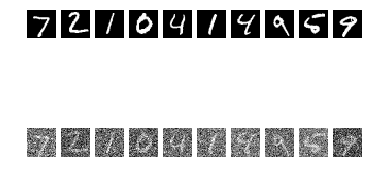

In [8]:
imgs = np.concatenate((X_test[:10], X_test_noisy[:10]), axis=0)
draw(2, 10, *imgs)

In [9]:
denoiser.fit(
    X_train_noisy, X_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(X_test_noisy, X_test),
    callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 120s - loss: 0.1784 - val_loss: 0.1251
Epoch 2/100
60000/60000 [==============================] - 122s - loss: 0.1183 - val_loss: 0.1127
Epoch 3/100
60000/60000 [==============================] - 120s - loss: 0.1108 - val_loss: 0.1076
Epoch 4/100
60000/60000 [==============================] - 126s - loss: 0.1070 - val_loss: 0.1046
Epoch 5/100
60000/60000 [==============================] - 117s - loss: 0.1047 - val_loss: 0.1021
Epoch 6/100
60000/60000 [==============================] - 120s - loss: 0.1031 - val_loss: 0.1012
Epoch 7/100
60000/60000 [==============================] - 117s - loss: 0.1022 - val_loss: 0.1002
Epoch 8/100
60000/60000 [==============================] - 117s - loss: 0.1013 - val_loss: 0.1014
Epoch 9/100
60000/60000 [==============================] - 117s - loss: 0.1007 - val_loss: 0.1010
Epoch 10/100
60000/60000 [==============================] - 117s - l

KeyboardInterrupt: 